## Student Performance

In this analysis, we will look at the Student Population and using their data, we will try and find a relationship between certain features and their individual performance. 

#### The data  (We will be analyzing the math scores of each student) :
#### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. **school** - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. **sex** - student's sex (binary: "F" - female or "M" - male)
3. **age** - student's age (numeric: from 15 to 22)
4. **address** - student's home address type (binary: "U" - urban or "R" - rural)
5. **famsize** - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. **Pstatus** - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. **Medu** - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary  
    education or 4 – higher education)
8. **Fedu** - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary
    education or 4 – higher education)
9. **Mjob** - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police),
     "at_home" or "other")
10. **Fjob** - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police),
     "at_home" or "other")
11. **reason** - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. **guardian** - student's guardian (nominal: "mother", "father" or "other")
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1
       hour)
14. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
20. **nursery** - attended nursery school (binary: yes or no)
21. **higher** - wants to take higher education (binary: yes or no)
22. **internet** - Internet access at home (binary: yes or no)
23. **romantic** - with a romantic relationship (binary: yes or no)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences** - number of school absences (numeric: from 0 to 93)

#### These grades are related with the course subject, Math or Portuguese:
31. **G1** - first period grade (numeric: from 0 to 20)
31. **G2** - second period grade (numeric: from 0 to 20)
32. **G3** - final grade (numeric: from 0 to 20, output target)

Data Source : 

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

In [2]:
# import necessary pacakages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
%matplotlib inline


### Loading in our Data 

In [3]:
# Since our columns are seperated by ';', we then use the sep parameter to split the data
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


We can see that there are many features that are not so important, so we will trim our data set down to just a few and using those selected features, we will predict the marks of students.

For simplicity we will work with just a few but later on, well work with more features.

In [4]:
# Set a new data frame that we can work with, without interfereing with our original data set

data = df.copy()
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
# Now we will select a few features that will be important to look at when analyzing student marks
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [6]:
# How many attributes did I make my new data frame?
data.shape

(395, 6)

Now I have 6 attributes or features that will be used for this analysis

In [7]:
# Lets chose what our label is that we want to predict
label = 'G3'

Now I will seperate the data into two arrays with one being the set of predictors or independant variables and the other array will consist of what we want to predict.

In [9]:
X = np.array(data.drop([label], 1))
y = np.array(data[label])

Now we will seperate the data into two categories: train and test. We will be splitting it so that we train 90% of the data and test with 10% of our data

In [11]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

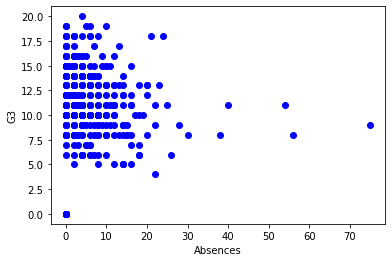

In [12]:
plt.scatter(data.absences, data.G3,  color='blue')
plt.xlabel("Absences")
plt.ylabel("G3")
plt.show()

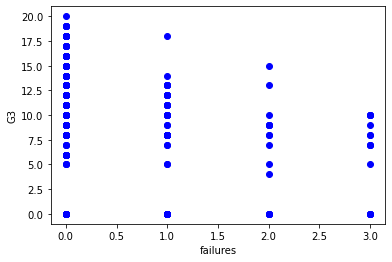

In [13]:
plt.scatter(data.failures, data.G3,  color='blue')
plt.xlabel("failures")
plt.ylabel("G3")
plt.show()

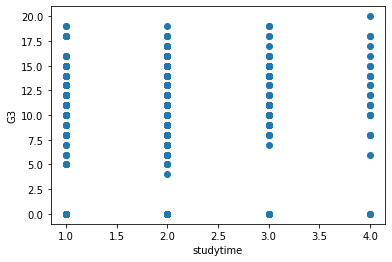

In [15]:
plt.scatter(data.studytime, data.G3)
plt.xlabel("studytime")
plt.ylabel("G3")
plt.show()

We can see from above that their isnt a strong relationship between individual categories vs the g3 score. 

## Building a linear model

In [16]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
# The accuracy?
acc = model.score(x_test, y_test)
print(acc)

0.8519096688501321
